In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
# !unzip /content/DryBeanDataset.zip

# df = pd.read_excel('/content/DryBeanDataset/Dry_Bean_Dataset.xlsx', sheet_name='Dry_Beans_Dataset')

# df.head()
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
response = requests.get(url)
with open("DryBeanDataset.zip", "wb") as file:
    file.write(response.content)


In [3]:
import zipfile

with zipfile.ZipFile("DryBeanDataset.zip", "r") as zip_ref:
    zip_ref.extractall("DryBeanDataset")


In [5]:
import os
print(os.getcwd())


C:\Users\MAYANK PUVVALA\Downloads\jupyter


In [8]:
df = pd.read_excel('C:/Users/MAYANK PUVVALA/Downloads/jupyter/DryBeanDataset/Dry_Bean_Dataset.xlsx', sheet_name='Dry_Beans_Dataset')
# C:\Users\MAYANK PUVVALA\Downloads\jupyter\DryBeanDataset


In [9]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [10]:
df.shape

(13611, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [12]:
features = df.iloc[:, :-1]
predictions = df.iloc[:, -1]

In [14]:

features.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [15]:
predictions.head()

0    SEKER
1    SEKER
2    SEKER
3    SEKER
4    SEKER
Name: Class, dtype: object

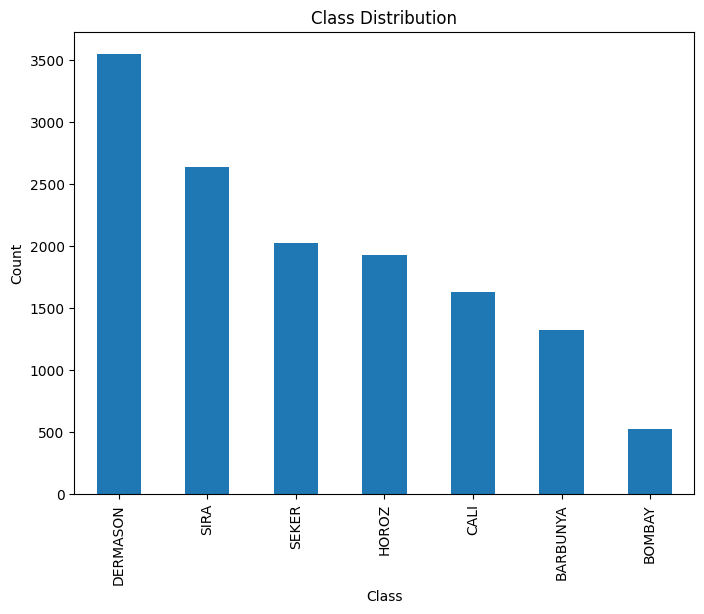

In [16]:
class_counts = predictions.value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
features_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=0, shuffle=True)


In [20]:
Train_data = pd.concat([X_train, y_train], axis = 'columns') 
Train_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
2301,0.290820,0.388220,0.231364,0.645793,-0.460127,-0.196153,0.285882,0.455219,0.693006,0.333326,0.088930,0.384845,-0.924239,-0.249794,0.351017,0.439605,BARBUNYA
5659,-0.339299,-0.186173,0.094435,-0.748538,1.473481,1.163953,-0.337820,-0.317860,-1.060762,-0.240620,-0.985896,-1.396526,0.932844,-0.834422,-1.356139,-0.807050,HOROZ
8597,-0.312767,-0.346569,-0.350480,-0.201303,-0.331562,-0.053928,-0.313839,-0.282290,0.039123,0.116731,0.514511,0.240863,0.042784,0.136067,0.203965,0.360644,SIRA
6157,-0.070705,0.184610,0.575640,-0.546147,2.009970,1.367747,-0.072151,0.028681,-3.003373,0.077679,-1.231744,-1.787840,0.606792,-1.183590,-1.698443,-1.504490,HOROZ
4544,0.677001,0.927113,1.078488,0.573800,0.914755,0.895680,0.687476,0.871959,-1.975670,-1.105687,-0.816136,-0.994848,-0.801775,-1.137483,-0.992515,-1.971704,CALI


In [21]:
Train_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000
mean,0.005300,0.004654,0.003168,0.006683,-0.003738,-0.004708,0.005252,0.005048,0.003887,0.003253,0.001060,0.004603,-0.006618,0.000883,0.004764,0.009997
std,1.008666,1.006125,1.005140,1.007537,1.002215,1.001606,1.008575,1.006676,1.001420,1.006536,1.003618,1.002291,1.003174,1.001633,1.002319,0.997228
min,-1.112719,-1.542583,-1.593407,-1.773645,-2.194347,-5.108333,-1.111184,-1.551678,-3.960880,-14.569454,-6.446210,-2.581167,-3.356153,-1.932991,-2.356255,-10.850363
25%,-0.565785,-0.702535,-0.777750,-0.584180,-0.619195,-0.389416,-0.568493,-0.635615,-0.632975,-0.313025,-0.693010,-0.601558,-0.601231,-0.946047,-0.624457,-0.291301
50%,-0.286014,-0.281844,-0.275805,-0.216486,-0.136827,0.141007,-0.288784,-0.246740,0.213079,0.245599,0.168045,0.029184,0.069589,-0.029419,-0.009334,0.310868
75%,0.284374,0.571817,0.661604,0.333613,0.500172,0.646202,0.287939,0.447952,0.761045,0.622998,0.736105,0.563398,0.623329,0.766204,0.535594,0.650140
max,6.874044,5.273833,4.886372,5.735751,3.434007,1.744901,7.036141,5.345339,2.372678,1.616807,1.972582,2.909817,3.446551,3.270983,3.189098,1.069377


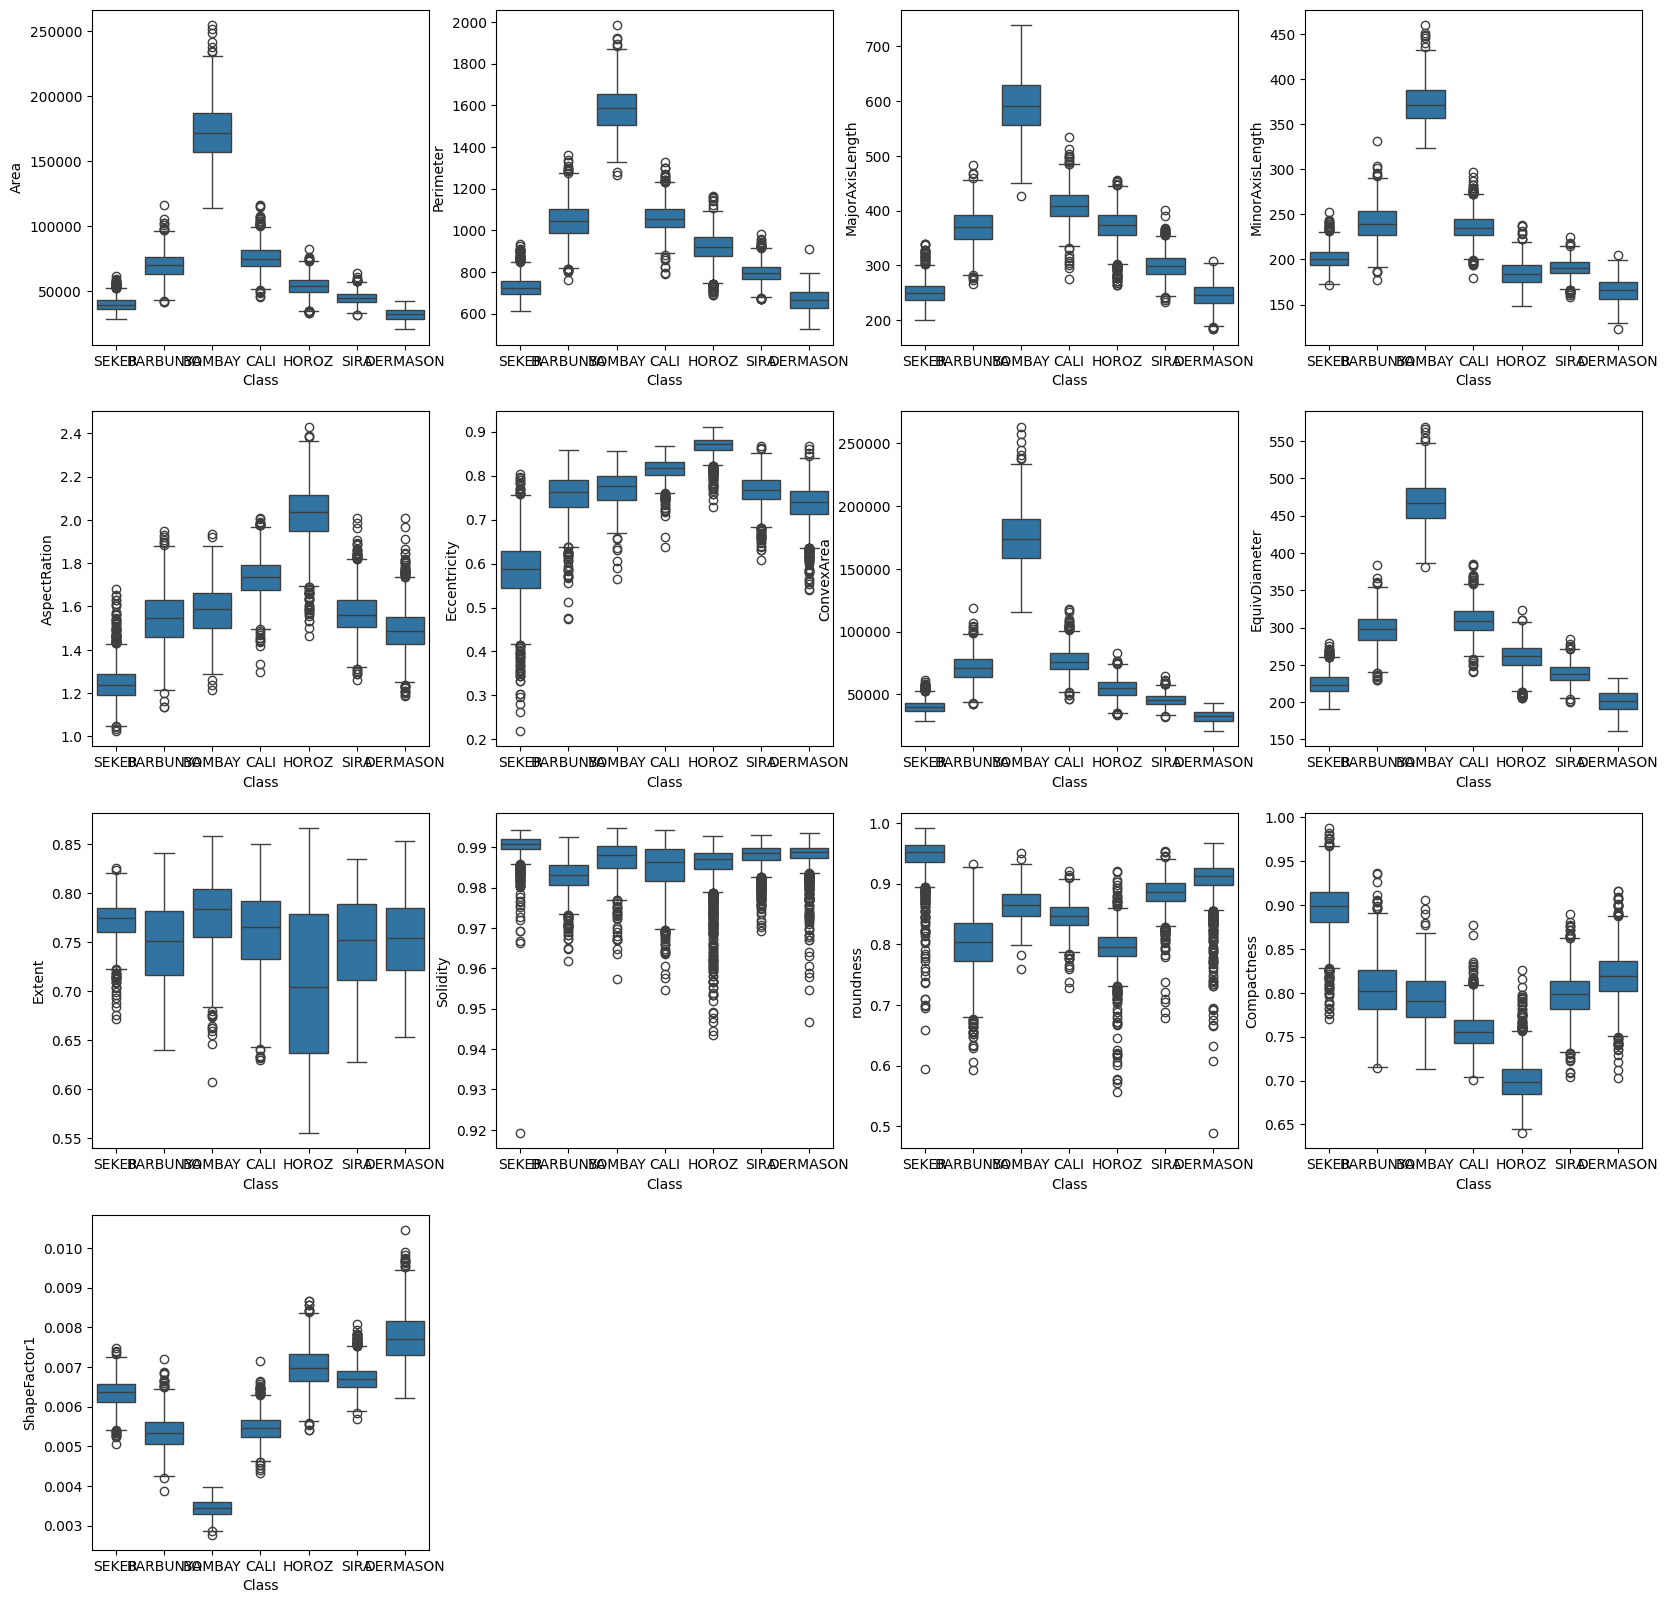

In [23]:
import seaborn as sns
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    if i < 13:
        sns.boxplot(data=df, x='Class', y=df.columns[i], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

In [24]:
Train_data.drop(['Solidity'], axis=1, inplace=True)
X_train.drop(['Solidity'], axis=1, inplace=True)
X_test.drop(['Solidity'], axis=1, inplace=True)

In [25]:
corr_mat = Train_data.corr(method ='pearson', numeric_only=True) 
corr_mat

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966918,0.932221,0.952043,0.239452,0.266729,0.999938,0.985161,0.059334,-0.354805,-0.266025,-0.848590,-0.639106,-0.270282,-0.349066
Perimeter,0.966918,1.000000,0.977325,0.913728,0.382534,0.390026,0.967893,0.991352,-0.016391,-0.544975,-0.404357,-0.864932,-0.766911,-0.406125,-0.422172
MajorAxisLength,0.932221,0.977325,1.000000,0.827001,0.547740,0.540998,0.932992,0.961842,-0.073150,-0.593067,-0.565999,-0.774066,-0.858664,-0.565981,-0.475918
MinorAxisLength,0.952043,0.913728,0.827001,1.000000,-0.010645,0.019583,0.951780,0.948948,0.150423,-0.208578,-0.013783,-0.947309,-0.471586,-0.018220,-0.256562
AspectRation,0.239452,0.382534,0.547740,-0.010645,1.000000,0.925022,0.241027,0.301050,-0.368928,-0.764763,-0.987757,0.026913,-0.837089,-0.978710,-0.448105
Eccentricity,0.266729,0.390026,0.540998,0.019583,0.925022,1.000000,0.268499,0.317681,-0.318915,-0.721132,-0.970740,0.020852,-0.860338,-0.981395,-0.446877
ConvexArea,0.999938,0.967893,0.932992,0.951780,0.241027,0.268499,1.000000,0.985416,0.057501,-0.359418,-0.267885,-0.848582,-0.640680,-0.272164,-0.355452
EquivDiameter,0.985161,0.991352,0.961842,0.948948,0.301050,0.317681,0.985416,1.000000,0.033427,-0.432897,-0.325256,-0.892929,-0.712432,-0.328177,-0.384991
Extent,0.059334,-0.016391,-0.073150,0.150423,-0.368928,-0.318915,0.057501,0.033427,1.000000,0.343148,0.353168,-0.145980,0.234759,0.346656,0.149223
roundness,-0.354805,-0.544975,-0.593067,-0.208578,-0.764763,-0.721132,-0.359418,-0.432897,0.343148,1.000000,0.765992,0.228356,0.780560,0.761121,0.469367


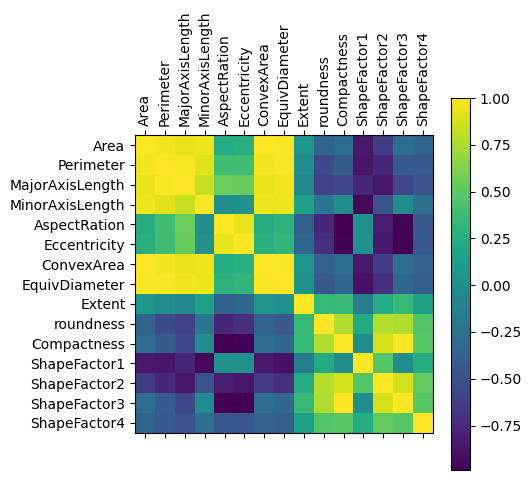

In [26]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [27]:
Train_data.drop(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3', 'AspectRation'], axis=1, inplace=True)
X_train.drop(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3', 'AspectRation'], axis=1, inplace=True)
X_test.drop(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3', 'AspectRation'], axis=1, inplace=True)

corr_mat = Train_data.corr(method ='pearson', numeric_only=True) #Pearson correlation is used
corr_mat

,Area,Eccentricity,Extent,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
Area,1.000000,0.266729,0.059334,-0.354805,-0.266025,-0.848590,-0.639106,-0.349066
Eccentricity,0.266729,1.000000,-0.318915,-0.721132,-0.970740,0.020852,-0.860338,-0.446877
Extent,0.059334,-0.318915,1.000000,0.343148,0.353168,-0.145980,0.234759,0.149223
roundness,-0.354805,-0.721132,0.343148,1.000000,0.765992,0.228356,0.780560,0.469367
Compactness,-0.266025,-0.970740,0.353168,0.765992,1.000000,-0.011606,0.868172,0.482422
ShapeFactor1,-0.848590,0.020852,-0.145980,0.228356,-0.011606,1.000000,0.468625,0.240989
ShapeFactor2,-0.639106,-0.860338,0.234759,0.780560,0.868172,0.468625,1.000000,0.524222
ShapeFactor4,-0.349066,-0.446877,0.149223,0.469367,0.482422,0.240989,0.524222,1.000000


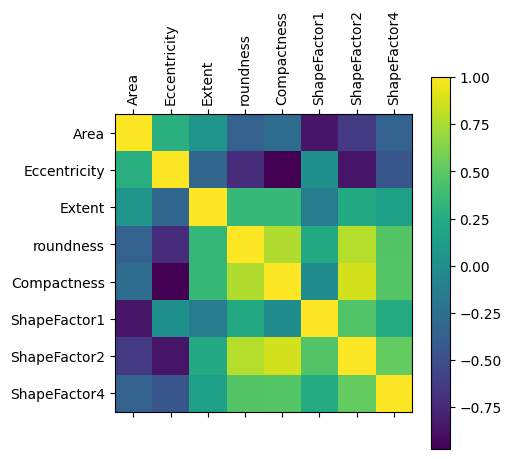

In [28]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy') 

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train) 
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import f1_score, confusion_matrix

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  1.0
Train confusion matrix: 
 [[1067    0    0    0    0    0    0]
 [   0  430    0    0    0    0    0]
 [   0    0 1280    0    0    0    0]
 [   0    0    0 2811    0    0    0]
 [   0    0    0    0 1538    0    0]
 [   0    0    0    0    0 1651    0]
 [   0    0    0    0    0    0 2111]]
Test F1 score:  0.891
Test confusion matrix: 
 [[226   0  15   0   3   4   7]
 [  1  91   0   0   0   0   0]
 [ 28   0 309   0   9   1   3]
 [  0   0   0 653   6  18  58]
 [  2   0  13   4 360   0  11]
 [  2   0   0   5   0 354  15]
 [  5   0   3  65   9  10 433]]


In [31]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=8) #Set max depth to 8
model1.fit(X_train, y_train) #Training the model on train data
y_pred_train = model1.predict(X_train) #Make predictions on the training set
y_pred = model1.predict(X_test) #Make predictions on the testing set

F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.942
Train confusion matrix: 
 [[ 989    0   49    1    2    4   22]
 [   0  430    0    0    0    0    0]
 [  50    1 1217    0    5    2    5]
 [   0    0    0 2654    0   22  135]
 [   6    0   16   10 1468    0   38]
 [   4    0    0   25    0 1592   30]
 [   2    0    4  180    6   19 1900]]
Test F1 score:  0.912
Test confusion matrix: 
 [[222   1  18   0   3   2   9]
 [  1  91   0   0   0   0   0]
 [ 22   0 318   0   5   2   3]
 [  0   0   0 679   3  14  39]
 [  1   0  12   4 361   0  12]
 [  1   0   0   4   0 355  16]
 [  1   0   4  56   3   4 457]]


In [32]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=12) #Set max depth to 12
model2.fit(X_train, y_train) #Training the model on train data
y_pred_train = model2.predict(X_train) #Make predictions on the training set
y_pred = model2.predict(X_test) #Make predictions on the testing set

#Check evaluation metrices

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.982
Train confusion matrix: 
 [[1057    0    2    0    0    0    8]
 [   0  430    0    0    0    0    0]
 [  14    0 1264    0    1    0    1]
 [   0    0    0 2693    0    0  118]
 [   0    0    1    1 1533    0    3]
 [   0    0    0    1    0 1645    5]
 [   4    0    0   25    4   12 2066]]
Test F1 score:  0.903
Test confusion matrix: 
 [[229   0  14   0   2   5   5]
 [  1  91   0   0   0   0   0]
 [ 22   0 316   0   8   1   3]
 [  0   0   0 645   4  18  68]
 [  1   0  13   3 362   0  11]
 [  2   0   0   5   0 356  13]
 [  4   0   1  46   9   7 458]]


In [33]:
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=8, class_weight='balanced') #Set class_weight to 'balanced' to counter class imbalance
model3.fit(X_train, y_train) #Training the model on train data
y_pred_train = model3.predict(X_train) #Make predictions on the training set
y_pred = model3.predict(X_test) #Make predictions on the testing set

#Check evaluation metrices

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.928
Train confusion matrix: 
 [[1017    0   33    0    1    3   13]
 [   0  430    0    0    0    0    0]
 [  48    0 1214    0   13    0    5]
 [   1    0    0 2451    3   33  323]
 [   8    0   16    7 1474    1   32]
 [   3    0    1   23    0 1585   39]
 [  21    0    5  100   17   45 1923]]
Test F1 score:  0.9
Test confusion matrix: 
 [[229   0  14   0   2   4   6]
 [  0  92   0   0   0   0   0]
 [ 32   0 311   0   4   1   2]
 [  0   0   0 634   4  11  86]
 [  3   0   5   1 364   0  17]
 [  2   0   0   2   0 359  13]
 [  7   0   1  40   7  11 459]]


In [34]:
model4 = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', ccp_alpha=0.1)
model4.fit(X_train, y_train) #Training the model on train data
y_pred_train = model4.predict(X_train) #Make predictions on the training set
y_pred = model4.predict(X_test) #Make predictions on the testing set

#Check evaluation metrices

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.843
Train confusion matrix: 
 [[ 760    1  219    0    5    1   81]
 [   0  430    0    0    0    0    0]
 [ 129    0 1080    0   41    0   30]
 [   0    0    0 2397   13  252  149]
 [   1    0   12   14 1482    0   29]
 [ 269    0    0   15    0 1284   83]
 [   7    0    0  281   60   18 1745]]
Test F1 score:  0.84
Test confusion matrix: 
 [[180   0  49   0   2   1  23]
 [  0  92   0   0   0   0   0]
 [ 47   0 280   0  14   1   8]
 [  0   0   0 637   4  63  31]
 [  0   0   7   3 368   0  12]
 [ 50   0   0   1   0 302  23]
 [  0   0   0  73  20   5 427]]


In [37]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree as a dot file
dot_data = export_graphviz(model3, out_file=None,
                           feature_names=X_train.columns,
                           class_names=list(np.unique(y_train.values)),
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize the decision tree using Graphviz
graph = graphviz.Source(dot_data)
graph.render("Dry Beans Decision Tree")

'Dry Beans Decision Tree.pdf'